# Project 2: Mini deep-learning framework

In [60]:
import matplotlib.pyplot as plt #To remove (use matplotlib)
from torch import empty
import numpy as np
import math

import torch
torch.set_grad_enabled(False)

## Data generation

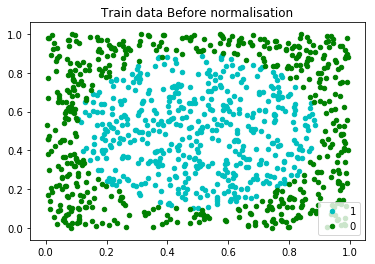

Point outside:  518
Point inside:   482


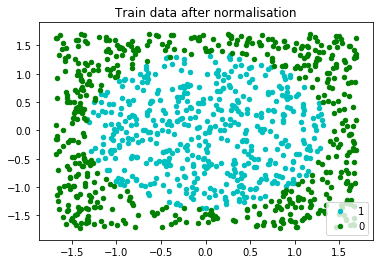

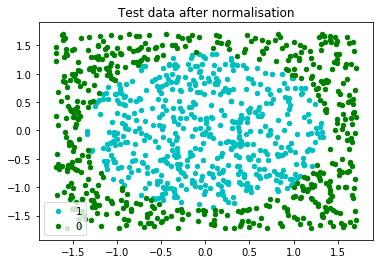

In [61]:
def generate_disc_set(nb):
    X = empty(nb,2).uniform_(0,1)
    Y = ( (X - 0.5).norm(dim=1)  <=  math.sqrt(1/(2*math.pi)) ).type(torch.LongTensor)
    return(X, Y)


train_input, train_target = generate_disc_set(1000)
test_input, test_target = generate_disc_set(1000)



plt.scatter(train_input[(train_target==1),0] ,train_input[(train_target==1),1], color = "c", s=20)
plt.scatter(train_input[(train_target==0),0] ,train_input[(train_target==0),1], color = "g", s=20)
plt.title("Train data Before normalisation")
plt.legend(["1", "0"] )
plt.show()

print("Point outside: ", train_input[(train_target==0),0].size(0))
print("Point inside:  ", train_input[(train_target==1),0].size(0))


mu, std = train_input.mean(0), train_input.std(0)
train_input.sub_(mu).div_(std)
test_input.sub_(mu).div_(std)

plt.scatter(train_input[(train_target==1),0] ,train_input[(train_target==1),1], color = "c", s=20)
plt.scatter(train_input[(train_target==0),0] ,train_input[(train_target==0),1], color = "g", s=20)
plt.title("Train data after normalisation")
plt.legend(["1", "0"] )
plt.show()

plt.scatter(test_input[(test_target==1),0] ,test_input[(test_target==1),1], color = "c", s=20)
plt.scatter(test_input[(test_target==0),0] ,test_input[(test_target==0),1], color = "g", s=20)
plt.title("Test data after normalisation")
plt.legend(["1", "0"] )
plt.show()


## Classic Structure

In [62]:
class Module( object ):
    def forward( self , *input ):
        raise NotImplementedError

        def backward ( self , *gradwrtoutput ):
            raise NotImplementedError

            def param ( self ) :
                return []

## Non linearity

In [63]:
class Tanh():
    def forward( self , x ):
        return torch.tanh(x)

    def backward ( self , *gradwrtoutput ):
        #return (1 - torch.pow(torch.tanh(x),2)) * (gradwrtoutput[0])
        raise NotImplementedError
        

    def param ( self ) :
        return []
    
class Relu():
    def forward( self , x ):
        y = empty(x.size())
        y[x<=0] = 0
        y[x>0] = x[x>0]
        return y

    def backward ( self , *gradwrtoutput ):
        raise NotImplementedError

    def param ( self ) :
        return []

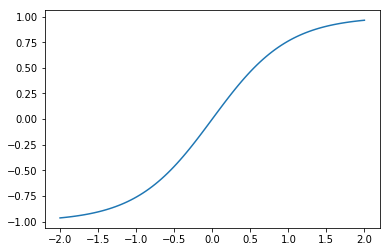

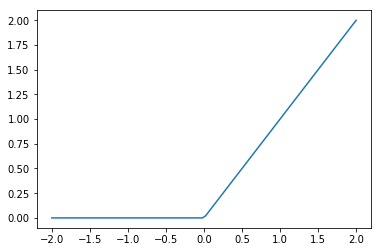

In [66]:
tanh_1 = Tanh()
x = torch.linspace(-2,2,100)

y = tanh_1.forward(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

#print(tanh_1.backward(x))


relu_1 = Relu()
y = relu_1.forward(x)
plt.plot(x.numpy(), y.numpy())
plt.show()
